In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#%matplotlib qt

In [2]:
# Define sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Define function for Y
def Yfunc(X):
    # X = n by 2 array
    n = X.shape[0]
    a1 = np.array([[3,3]]).T
    a2 = np.array([[3,-3]]).T
    Z = np.random.normal(size=(n))
    y = np.empty(n)
    
    for i in range(n):
        y[i] = sigmoid(np.matmul(a1.T,X[i,:].T)) + np.power(np.matmul(a2.T,X[i,:].T),2) + 0.3*Z[i]
        
    return y

Train neural network with 100 random samples from $Y = \sigma(a_1^TX) + (a_2^TX)^2 + 0.3Z$ where $\sigma$ is the sigmoid function, $Z$ is a standard normal, $X^T = \lbrack X_1, X_2 \rbrack^T$ where each $X_j$ is an independent standard normal, and $a_1 = \lbrack 3, 3 \rbrack^T$ and $a_2 = \lbrack 3, -3 \rbrack^T$.

In [3]:
# Plot MSE curves for the training and test data as a function of training epoch for different values of alpha
alpha = [.01,.1,1,10,100,300,500,700,1000]
tolerance = 1e-4 # Default convergence criteria for MLPRegressor

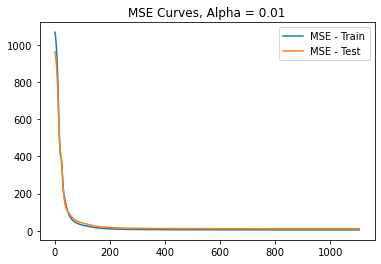

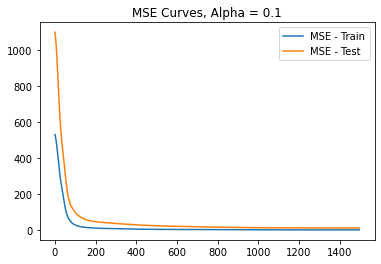

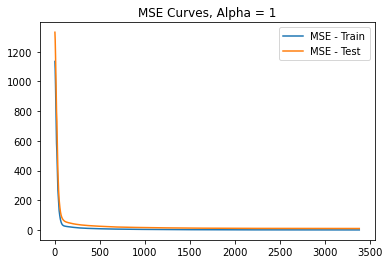

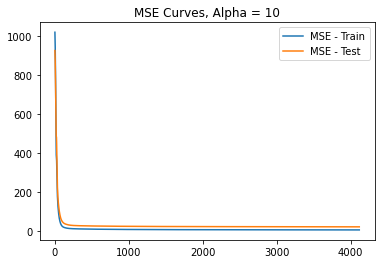

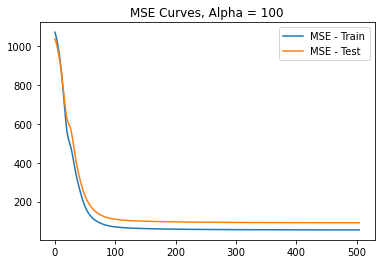

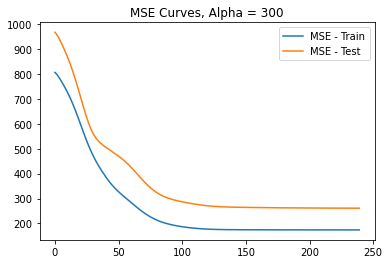

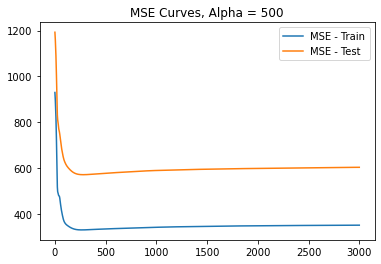

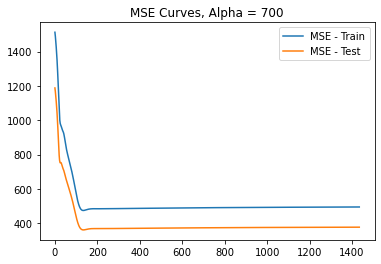

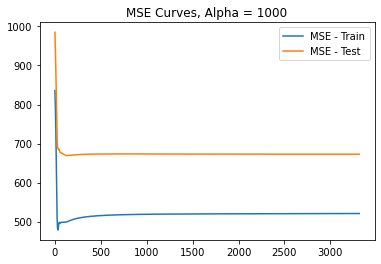

In [4]:
for a in alpha:
    # Generate training data of size 100
    X_train = np.random.normal(size=(100,2))
    y_train = Yfunc(X_train)
        
    # Create neural network
    mlp = MLPRegressor(hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, alpha=a, tol=tolerance)
    #mlp.fit(X_train, y_train)
        
    # Generate test data of size 1000
    X_test = np.random.normal(size=(1000,2))
    y_test = Yfunc(X_test)

    mse_train = []
    mse_test = []
    loss_t = 1e6 # Initialize loss tracking variables for determining convergence
    loss_tp1 = 1e5
    
    # Train mlp one step at a time until convergence, calculating and recording the train/test MSEs at each iteration
    while abs(loss_tp1 - loss_t) >= tolerance:
        mlp.partial_fit(X_train, y_train)
        loss_t = loss_tp1
        loss_tp1 = mlp.loss_
        
        #mse_train.append(np.sum(np.power(mlp.predict(X_train) - y_train, 2))/100)
        #mse_test.append(np.sum(np.power(mlp.predict(X_test) - y_test, 2))/1000)
        mse_train.append(mean_squared_error(mlp.predict(X_train),y_train))
        mse_test.append(mean_squared_error(mlp.predict(X_test),y_test))
        
    # Plot MSE curves
    fig, ax = plt.subplots()
    ax.plot(range(len(mse_train)), mse_train, label='MSE - Train')
    ax.plot(range(len(mse_test)), mse_test, label='MSE - Test')
    ax.set_title('MSE Curves, Alpha = {}'.format(a))
    plt.legend()
    plt.show()

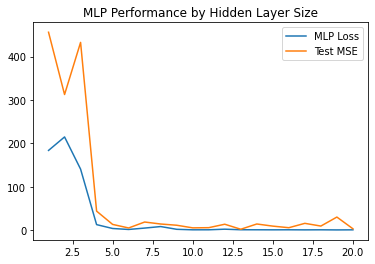

In [5]:
# Vary the number of hidden units between 1-20 and determine the minimum number needed for good performance
losses = []
mse_test = []
for i in range(1,21):
    # Generate training data of size 100
    X_train = np.random.normal(size=(100,2))
    y_train = Yfunc(X_train)
        
    # Create neural network
    mlp = MLPRegressor(hidden_layer_sizes=(i,), solver='sgd', max_iter=10000, alpha=0.1, tol=tolerance)
    #mlp.fit(X_train, y_train)
        
    # Generate test data of size 1000
    X_test = np.random.normal(size=(1000,2))
    y_test = Yfunc(X_test)

    mlp.fit(X_train,y_train)
    losses.append(mlp.loss_)
    mse_test.append(mean_squared_error(mlp.predict(X_test),y_test))
        
# Plot curves
plt.plot(range(1,21), losses, label='MLP Loss')
plt.plot(range(1,21), mse_test, label='Test MSE')
plt.title('MLP Performance by Hidden Layer Size')
plt.legend()
#plt.title('MSE Curves, Hidden Layer Size = {}'.format(i))
plt.show()          